# 의미 연결망 분석(Semantic Network Analysis)
* 사회 연결망 분석(Social Network Analysis)는 분석 대상 및 분석 대상들간의 관계를   
연결망 구조로 표현하고 이를 계량적으로 제시하는 분석 기법
* 사회 연결망 분석은 사람, 장소, 물품 등의 객체 간의 관계를 분석하는데 효과적이며  
주로 친구 관계, 전력 공급 등을 분석하는데 사용
* 사회 연결망 분석 기법을 텍스트 내 단어의 관계에 적용한 것이 바로 의미 연결망 분석
* 의미 연결망 분석에서는 일정한 범위 내에서 어휘가 동시에 등장하면 서로 연결된 것으로 간주, 이 연결 관계들을 분석


## n-gram

- n개의 연속적인 단어 나열을 의미한다. 코퍼스에서 n개의 단어 뭉치 단위로 끊어서 이를 하나의 토큰으로 간주.
    - 예를 들어서 An adorable little boy is spreading smiles이 있을 때, 각 n에 대해서 n-gram을 전부 구한다면
        - unigrams : an, adorable, little, boy, is, spreading, smiles
        - bigrams : an adorable, adorable little, little boy, boy is, is spreading, spreading smiles
        - trigrams : an adorable little, adorable little boy, little boy is, boy is spreading, is spreading smiles
        - 4-grams : an adorable little boy, adorable little boy is, little boy is spreading, boy is spreading smiles
    - n-gram을 사용할 때 다음에 나올 단어의 예측은 n-1개의 단어에만 의존한다.
    - 'An adorable little boy is spreading' 다음에 나올 단어를 예측하고 싶다고 할 때, n=4라고 한 4-gram을 이용한 언어 모델을 사용한다고 하면 이 경우, spreading 다음에 올 단어를 예측하는 것은 n-1에 해당되는 앞의 3개의 단어만을 고려 (boy is spreading)
    
    
- `nltk` 라이브러리는 편하게 n-gram을 생성할 수 있는 함수를 제공
- 많이 사용되는 `bigrams`의 경우에는 별도의 함수를 제공하니 해당 내용을 참조하여 n-gram 생성

In [2]:
import nltk
nltk.download("punkt")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\tmdwn\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [8]:
from nltk import word_tokenize, bigrams

sentence = "An adorable little boy is spreading smiles"
tokens = word_tokenize(sentence)
bgram = bigrams(tokens)
bgram_list = [x for x in bgram]
print(bgram_list)

[('An', 'adorable'), ('adorable', 'little'), ('little', 'boy'), ('boy', 'is'), ('is', 'spreading'), ('spreading', 'smiles')]


In [9]:
from nltk.util import ngrams

tgram = ngrams(tokens, 3)
qgram = ngrams(tokens, 4)

tgram_list = [x for x in tgram]
qgram_list = [x for x in qgram]

print(tgram_list)
print(qgram_list)

[('An', 'adorable', 'little'), ('adorable', 'little', 'boy'), ('little', 'boy', 'is'), ('boy', 'is', 'spreading'), ('is', 'spreading', 'smiles')]
[('An', 'adorable', 'little', 'boy'), ('adorable', 'little', 'boy', 'is'), ('little', 'boy', 'is', 'spreading'), ('boy', 'is', 'spreading', 'smiles')]


## 어휘 동시 출현 빈도의 계수화


- 동시 출현(Co-occurrence)란 두 개 이상의 어휘가 일정한 범위나 거리 내에서 함께 출현하는 것을 의미
- 단어간의 동시 출현 관계를 분석하면 문서나 문장으로부터 두 단어가 유사한 의미를 가졌는지 등의 추상화된 정보를 얻을 수 있음
- 동시 출현 빈도는 Window라는 지정 범위 내에서 동시 등장한 어휘를 확률 등으로 계수화 가능
- 예를 들어, 단어 뒤 잘못된 단어가 온다면, 이를 동시 출현 빈도가 높은 단어로 교정 가능

- 어휘 동시 출현 빈도 행렬은 하나하나 측정할 수도 있지만, 바이그램 개수를 정리하면 편리하게 만들어 볼 수 있음
- `nltk`에서 제공하는 `ConditionalFreqDist` 함수를 이용하면 문맥별 단어 빈도를 쉽게 측정 가능

In [115]:
from nltk import ConditionalFreqDist

sentences = ["I love winter. because I love snow", "I love science", "I know this cod"]

tokens = [word_tokenize(x) for x in sentences]
bgrams = [bigrams(x) for x in tokens]

token = []
for i in bgrams :
    token += ([x for x in i])
cfd = ConditionalFreqDist(token)
cfd.conditions()
# conditions : 엑세스된 조건 목록을 반환한다.

['I', 'love', 'winter', '.', 'because', 'know', 'this']

In [60]:
print(cfd["I"]["love"])

3


- "I"와 "love"가 동시 출현한 횟수는 3번

In [61]:
print(cfd["I"].most_common())

[('love', 3), ('know', 1)]


- "I"와 동시 출현한 단어와 횟수

In [62]:
import numpy as np
freq_matrix = []

for i in cfd.keys() :
    temp = []
    for j in cfd.keys() :
        temp.append(cfd[i][j]) # 문장과 문장간의 동시출현 빈도 행렬
    freq_matrix.append(temp)
freq_matrix = np.array(freq_matrix)

print(cfd.keys())
print(freq_matrix)

dict_keys(['I', 'love', 'winter', '.', 'because', 'know', 'this'])
[[0 3 0 0 0 1 0]
 [0 0 1 0 0 0 0]
 [0 0 0 1 0 0 0]
 [0 0 0 0 1 0 0]
 [1 0 0 0 0 0 0]
 [0 0 0 0 0 0 1]
 [0 0 0 0 0 0 0]]


- 해당 동시 출현 빈도 행렬을 좀 더 보기 쉷도록 데이터프레임으로 시각화

In [63]:
import pandas as pd

df = pd.DataFrame(freq_matrix, index = cfd.keys(), columns = cfd.keys())

df.style.background_gradient(cmap = "coolwarm")

,I,love,winter,.,because,know,this
I,0,3,0,0,0,1,0
love,0,0,1,0,0,0,0
winter,0,0,0,1,0,0,0
.,0,0,0,0,1,0,0
because,1,0,0,0,0,0,0
know,0,0,0,0,0,0,1
this,0,0,0,0,0,0,0


- networkx 라이브러리를 사용해서 해당 행렬을 그래프로 시각화

- 앞서 만든 데이터프레임을 그래프로 변환
- 넘파이 배열 등으로도 가능하나, 이 경우 별도로 라벨을 지정해줘야만 한다.

In [64]:
import networkx as nx

G = nx.from_pandas_adjacency(df)

print(G.nodes()) # 각각의 단어들이 node
print(G.edges()) # edges는 관계를 확인

['I', 'love', 'winter', '.', 'because', 'know', 'this']
[('I', 'love'), ('I', 'because'), ('I', 'know'), ('love', 'winter'), ('winter', '.'), ('.', 'because'), ('know', 'this')]


- 각 엣지에 접근해보면 각 엣지의 가중치에 각 단어간의 빈도가 사용된 것을 확인 가능

In [65]:
print(G.edges()[("I", "love")])
print(G.edges()[("I", "know")])

{'weight': 3}
{'weight': 1}


- nx.draw를 통해 간편하게 그래프를 시각화할 수 있음

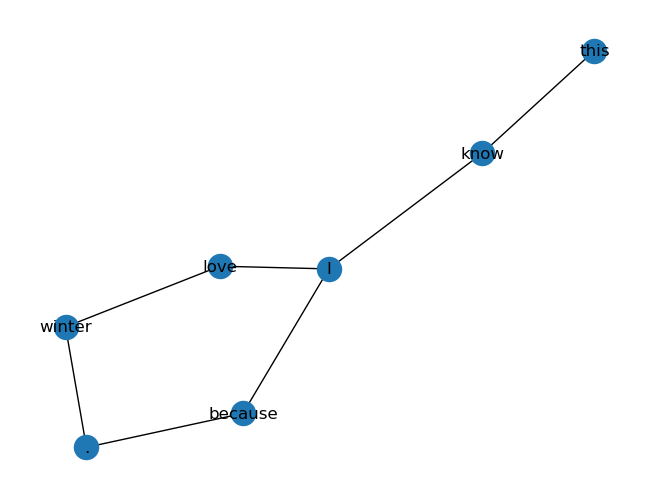

In [66]:
nx.draw(G, with_labels = True)

- 어휘 동시 출현 빈도를 이용하면 어휘 동시 출현 확률까지 측정 가능
- 어휘 동시 출현 확률 계산에는 `nltk`의 `ConditionalProbDist`를 이용

In [129]:
from nltk.probability import ConditionalProbDist, MLEProbDist

cpd = ConditionalProbDist(cfd, MLEProbDist)

cpd.conditions()

['I', 'love', 'winter', '.', 'because', 'know', 'this']

In [130]:
# 확률 매트릭스
prob_matrix = []

for i in cpd.keys() :
    prob_matrix.append([cpd[i].prob(j) for j in cpd.keys()])
    
prob_matrix = np.array(prob_matrix)

print(cpd.keys())
print(prob_matrix)

dict_keys(['I', 'love', 'winter', '.', 'because', 'know', 'this'])
[[0.         0.75       0.         0.         0.         0.25
  0.        ]
 [0.         0.         0.33333333 0.         0.         0.
  0.        ]
 [0.         0.         0.         1.         0.         0.
  0.        ]
 [0.         0.         0.         0.         1.         0.
  0.        ]
 [1.         0.         0.         0.         0.         0.
  0.        ]
 [0.         0.         0.         0.         0.         0.
  1.        ]
 [0.         0.         0.         0.         0.         0.
  0.        ]]


In [131]:
df = pd.DataFrame(prob_matrix, index = cpd.keys(), columns = cpd.keys())
df.style.background_gradient(cmap = "coolwarm")

,I,love,winter,.,because,know,this
I,0.000000,0.750000,0.000000,0.000000,0.000000,0.250000,0.000000
love,0.000000,0.000000,0.333333,0.000000,0.000000,0.000000,0.000000
winter,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
.,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
because,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
know,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
this,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


- 확률 행렬도 인접 행렬로 간주할 수 있음
- 그래프 시각화시 빈도 행렬과 동일한 결과를 얻을 수 있으나, 확률을 가중치로 사용시 부정확한 결과를 얻을 수 있다

In [70]:
prob_G = nx.from_pandas_adjacency(df)

print(prob_G.nodes())
print(prob_G.edges())

['I', 'love', 'winter', '.', 'because', 'know', 'this']
[('I', 'love'), ('I', 'because'), ('I', 'know'), ('love', 'winter'), ('winter', '.'), ('.', 'because'), ('know', 'this')]


In [71]:
# 관계에 대한 확률값을 가진다
print(prob_G.edges()["I", "love"])
print(prob_G.edges()["I", "know"])

{'weight': 0.75}
{'weight': 0.25}


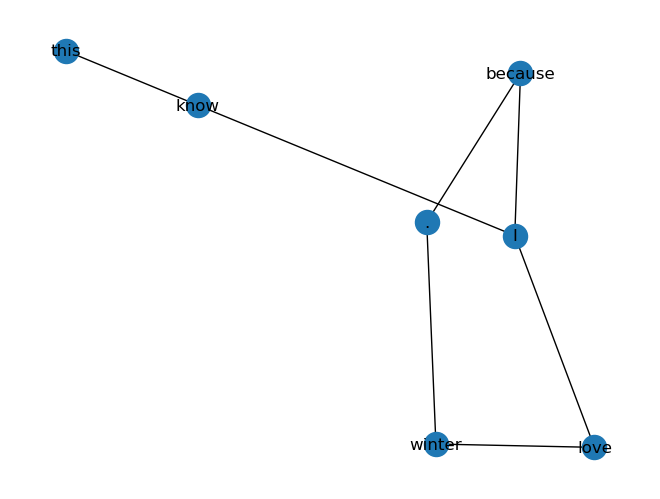

In [72]:
nx.draw(prob_G, with_labels = True)

## 중심성(Centrality) 지수

- 연결망 분석에서 가장 많이 주목하는 속성은 바로 중심성 지수
- 중심성은 전체 연결망에서 중심에 위치하는 정도를 표현하는 지표로, 이를 분석하면 연결 정도, 중요도 등을 알 수 있음
- 중심성 지수는 나타내는 특징에 따라 연결 중심성, 매개 중심성, 근접 중심성, 위세 중심성으로 구분

### 연결 중심성(Degree Centrality)


- 연결 중심성은 가장 기본적이고 직관적으로 중심섬을 측정하는 지표
- 텍스트에서 다른 단어와의 동시 출현 빈도가 많은 특정 단어는 연결 중심성이 높다고 볼 수 있음
- 연결 정도로만 측정하면 연결망의 크기에 따라 달라져 비교가 어렵기 때문에 여러 방법으로 표준화
- 주로 (특정 노드 i와 직접적으로 연결된 노드 수 / 노드 i와 직간접적으로 연결된 노드 수)로 계산

- 여기서 직접적으로 연결된 노드는 서로 엣지 관계인 노드를 뜻하며, 간접적으로 연결된 노드는 서로 엣지 관계는 아니나 다른 노드와 엣지에 의해 도달할 수 있는 노드를 말함

* 연결 중심성 계산 수식

$$ degree_{ik} = \sum_{i=1}^{N} Z_{ijk} = Z_{jk}$$
$$ outdegree_{ik} = \sum_{j=1}^{N} Z_{ijk} = Z_{ik} $$
$$ C_{i} = \sum_{j=1}^{n}(Z_{ij}+Z_{ji}) / \sum_{i=1}^{n}\sum_{j=1}^{n}(Z_{ij})\qquad단, 0\le C \le 1$$

- 해당 수식을 직접 계산할 수도 있으나,     
`networkx`에는 해당 라이브러리로 구성된 그래프의 연결 중심성을 쉽게 계산해주는 함수가 존재   

In [73]:
nx.degree_centrality(G)

{'I': 0.5,
 'love': 0.3333333333333333,
 'winter': 0.3333333333333333,
 '.': 0.3333333333333333,
 'because': 0.3333333333333333,
 'know': 0.3333333333333333,
 'this': 0.16666666666666666}

### 위세 중심성(Eigenvector Centraility)

- 위세 중심성은 연결된 상대 단어의 중요성에 가중치를 둠
- 중요한 단어와 많이 연결됐다면 위세 중심성은 높아지게 됨
- 위세 중심성은 고유 벡터로써 인접해 있는 노드의 위세 점수와 관련되어 있어 직접 계산하기는 쉽지 않음

- 위세 중심성 계산 수식

$$ P_i =\sum_{j=1}^{N-1}P_iZ_{ji},\qquad0 \le P_i \le 1$$

- 위세 중심성 계산에는 `eigenvector_centraility`를 이용해 계산
- `weight`로는 어휘 동시 출현 빈도를 이용

In [74]:
nx.eigenvector_centrality(G, weight = 'weight')

{'I': 0.6644809298647706,
 'love': 0.6312303298080678,
 'winter': 0.2163955306856155,
 '.': 0.12633826280029528,
 'because': 0.22589416306026036,
 'know': 0.20666846183679777,
 'this': 0.05903351764598431}

### 근접 중심성(Closeness Centrality)


- 근접 중심성은 한 단어가 다른 단어에 얼마나 가깝게 있는지를 측정하는 지표
- 직접적으로 연결된 노드만 측정하는 연결 중심성과는 다르게, 근접 중심성은 직간접적으로 연결된 모든 노드들 사이의 거리를 측정
- 근접 중심성을 측정하기 위해선 다음과 같이 계산

  (모든 노드 수 - 1 / 특정 노드 i에서 모든 노드에 이르는 최단 경로 수를 모두 더한 수)


$$ C_C(A) = \frac{1}{\frac{1}{N-1}\sum_{x \ne A}l_{X,A}} = \frac{N-1}{\sum_{x \ne A}l_{X,A}} $$

- 근접 중심성을 계산하기 위해선 `closeness_centrality()` 함수를 사용

In [76]:
nx.closeness_centrality(G, distance = "weight")

{'I': 0.5,
 'love': 0.3333333333333333,
 'winter': 0.375,
 '.': 0.46153846153846156,
 'because': 0.5,
 'know': 0.4,
 'this': 0.3}

### 매개 중심성(Betweeness Centrality)

- 매개 중심성은 한 단어가 단어들과의 연결망을 구축하는데 얼마나 도움을 주는지 측정하는 지표
- 매개 중심성이 높은 단어는 빈도 수가 작더라도 단어 간 의미부여 역할이 크기 때문에, 해당 단어를 제거하면 의사소통이 어려워짐
- 매개 중심성은 모든 노드 간 최단 경로에서 특정 노드가 등장하는 횟수로 측정하며,     
표준화를 위해 최댓값인 (N-1) x (N-2) / 2로 나눔

- 매개 중심성 계산 수식

$$ C_{B}^{'}(P_m) = \frac{\sum_i^N \sum_j^N \frac{g_{imj}}{g_{ij}}}{(\frac{N^2-3N+2}{2})}, \qquad 단, i<j,\quad i \ne j$$

- 매개 중심성을 계산하기 위해선 `current_flow_betweenness_centrality()` 함수를 이용

In [77]:
nx.current_flow_betweenness_centrality(G, weight = "weight")

<class 'networkx.utils.decorators.argmap'> compilation 32:4: FutureWarning: laplacian_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.


{'I': 0.687179487179487,
 'love': 0.3384615384615382,
 'winter': 0.22564102564102556,
 '.': 0.1948717948717947,
 'because': 0.24615384615384617,
 'know': 0.33333333333333354,
 'this': 5.921189464667501e-17}

### 페이지랭크(PageRank)

- 월드 와이드 웹과 같은 하이퍼링크 구조를 가지는 문서에 상대적 중요도에 따라 가중치를 부여하는 방법
- 이 알고리즘은 서로간에 인용과 참조로 연결된 임의의 묶음에 적용 가능
- 페이지 랭크는 더 중요한 페이지는 더 많은 다른 사이트로부터 링크를 받는다는 관찰에 기초

In [78]:
nx.pagerank(G)

{'I': 0.2508101731886893,
 'love': 0.19768655138343766,
 'winter': 0.11374963890358882,
 '.': 0.11838348842502726,
 'because': 0.11437964094488934,
 'know': 0.12881570103656187,
 'this': 0.07617480611780593}

In [79]:
# 시각화
# 노드 사이즈 계산
def get_node_size(node_values) :
    nsize = np.array([v for v in node_values])
    # normalize
    nsize = 1000 * (nsize - min(nsize))/ (max(nsize) - min(nsize))
    
    return nsize

In [135]:
dc = nx.degree_centrality(G).values()

nsize = np.array([v for v in dc])
nsize

array([0.5       , 0.33333333, 0.33333333, 0.33333333, 0.33333333,
       0.33333333, 0.16666667])

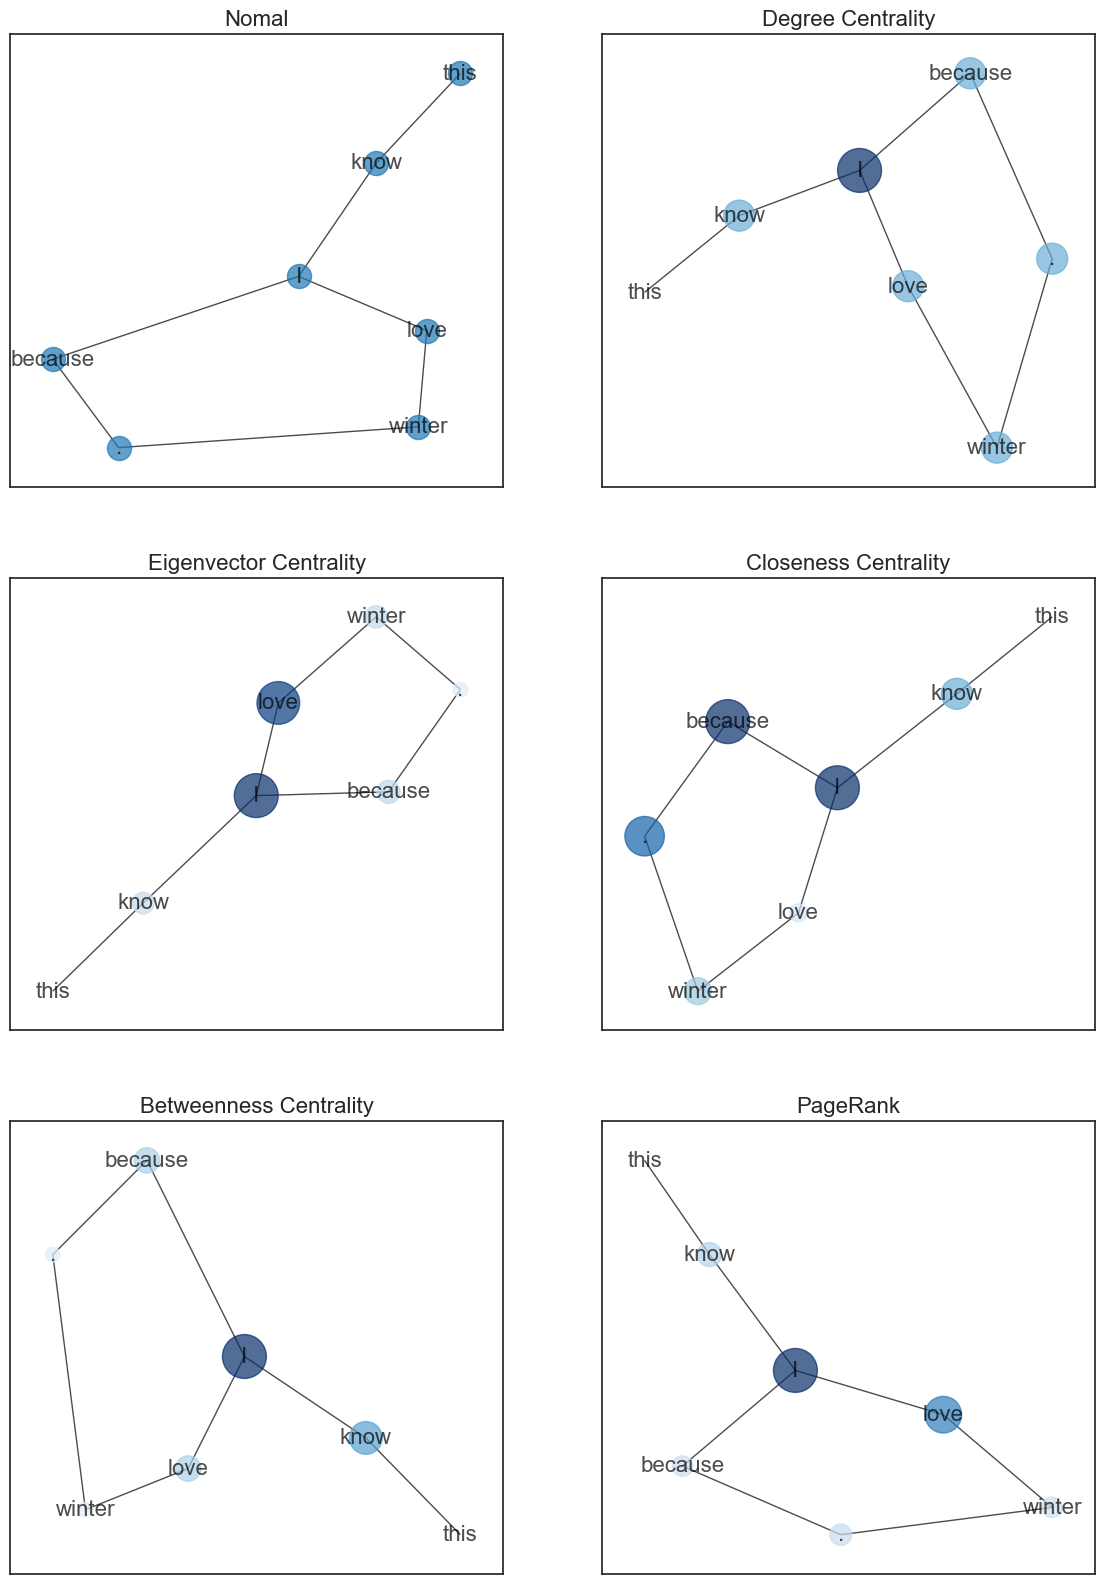

In [83]:
import matplotlib.pyplot as plt
plt.style.use("seaborn-white")

dc = nx.degree_centrality(G).values()
ec = nx.eigenvector_centrality(G, weight = "weight").values()
cc = nx.closeness_centrality(G, distance = "weight").values()
bc = nx.betweenness_centrality(G).values()
pr = nx.pagerank(G).values()

plt.figure(figsize = (14, 20))
plt.axis("off")

plt.subplot(321)
plt.title("Nomal", fontsize = 16)
nx.draw_networkx(G, font_size = 16, alpha = 0.7, cmap = plt.cm.Blues)

plt.subplot(322)
plt.title("Degree Centrality", fontsize = 16)
nx.draw_networkx(G, font_size = 16, 
                 node_color = list(dc),
                 node_size = get_node_size(dc),
                 alpha = 0.7, cmap = plt.cm.Blues)

plt.subplot(323)
plt.title("Eigenvector Centrality", fontsize = 16)
nx.draw_networkx(G, font_size = 16, 
                 node_color = list(ec),
                 node_size = get_node_size(ec),
                 alpha = 0.7, cmap = plt.cm.Blues)

plt.subplot(324)
plt.title("Closeness Centrality", fontsize = 16)
nx.draw_networkx(G, font_size = 16, 
                 node_color = list(cc),
                 node_size = get_node_size(cc),
                 alpha = 0.7, cmap = plt.cm.Blues)

plt.subplot(325)
plt.title("Betweenness Centrality", fontsize = 16)
nx.draw_networkx(G, font_size = 16, 
                 node_color = list(bc),
                 node_size = get_node_size(bc),
                 alpha = 0.7, cmap = plt.cm.Blues)

plt.subplot(326)
plt.title("PageRank", fontsize = 16)
nx.draw_networkx(G, font_size = 16, 
                 node_color = list(pr),
                 node_size = get_node_size(pr),
                 alpha = 0.7, cmap = plt.cm.Blues)

plt.show()

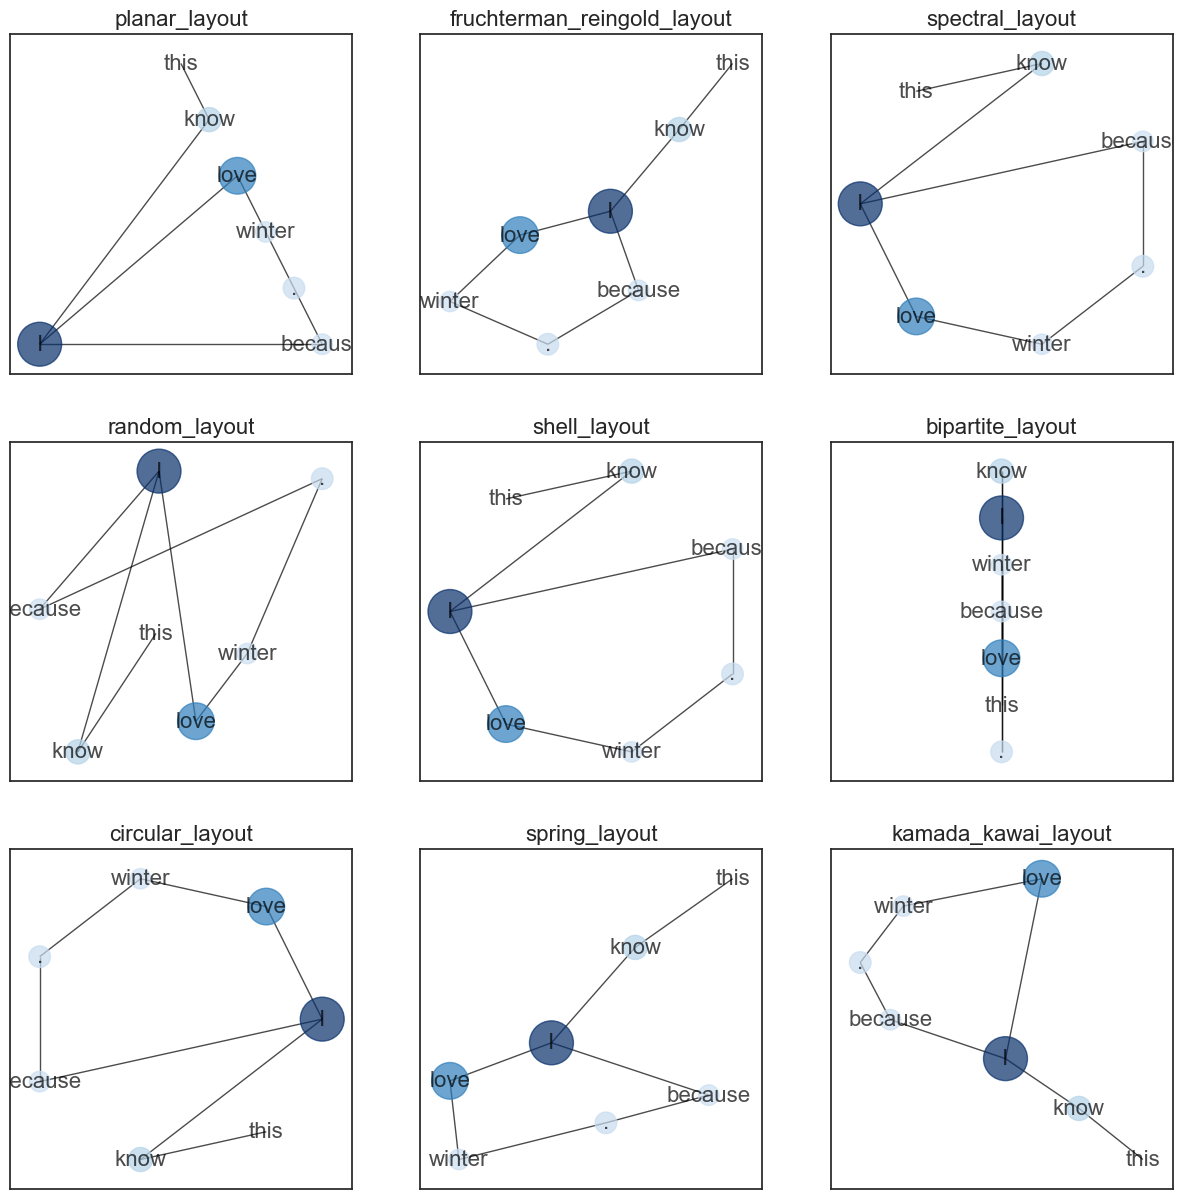

In [91]:
# 다양한 레이아웃

pl = nx.planar_layout(G)
frl = nx.fruchterman_reingold_layout(G)
sl = nx.spectral_layout(G)
rl = nx.random_layout(G)
sl = nx.shell_layout(G)
bl = nx.bipartite_layout(G, G.nodes())
cl = nx.circular_layout(G)
sl2 = nx.spring_layout(G)
kkl = nx.kamada_kawai_layout(G)

option = {
    "font_size" : 16, 
    "node_color" : list(pr),
    "node_size" : get_node_size(pr),
    "alpha" : 0.7, 
    "cmap" : plt.cm.Blues
}

plt.figure(figsize = (15, 15))
plt.axis("off")

plt.subplot(331)
plt.title("planar_layout", fontsize = 16)
nx.draw_networkx(G, pos = pl, **option)

plt.subplot(332)
plt.title("fruchterman_reingold_layout", fontsize = 16)
nx.draw_networkx(G, pos = frl, **option)

plt.subplot(333)
plt.title("spectral_layout", fontsize = 16)
nx.draw_networkx(G, pos = sl, **option)

plt.subplot(334)
plt.title("random_layout", fontsize = 16)
nx.draw_networkx(G, pos = rl, **option)

plt.subplot(335)
plt.title("shell_layout", fontsize = 16)
nx.draw_networkx(G, pos = sl, **option)

plt.subplot(336)
plt.title("bipartite_layout", fontsize = 16)
nx.draw_networkx(G, pos = bl, **option)

plt.subplot(337)
plt.title("circular_layout", fontsize = 16)
nx.draw_networkx(G, pos = cl, **option)

plt.subplot(338)
plt.title("spring_layout", fontsize = 16)
nx.draw_networkx(G, pos = sl2, **option)

plt.subplot(339)
plt.title("kamada_kawai_layout", fontsize = 16)
nx.draw_networkx(G, pos = kkl, **option)